# Step 1: Data acquisition

This step is to collect data from two different API endpoints, the Legacy Pagecounts API and the Pageviews API.The Legacy Pagecounts API provides access to desktop and mobile traffic data from December 2007 through July 2016.The Pageviews API provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month. The raw data that are extracted from both APIs will eb stored in 5 json files under "data" folder. 

In [1]:
import pandas as pd
import json
import requests

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# Parameters for getting aggregated legacy view data on desktop
desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016073100"
                    }
# Parameters for getting aggregated legacy view data on mobile
mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016073100"
                    }

# Parameters for getting aggregated current standard pageview data on desktop
desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021093000'
                        }
# Parameters for getting aggregated current standard pageview data on mobile web
mobileweb_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021093000'
                        }
# Parameters for getting aggregated current standard pageview data on mobile app
mobileapp_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021093000'
                        }
headers = {
    'User-Agent': 'https://github.com/Sophia1998',
    'From': 'sophiart@uw.edu'
}

In [4]:
# This function is used to use parameters to extract raw data
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    return response

In [5]:
# This function is used to store raw data into json files
def store_json_file(filename, data):
    with open(filename, 'w') as file_object:
         json.dump(data, file_object) 

In [6]:
# Extract raw data
desktop_monthly_legacy = api_call(endpoint_legacy, desktop_params_legacy)
mobile_monthly_legacy = api_call(endpoint_legacy, mobile_params_legacy)

desktop_monthly_pageviews = api_call(endpoint_pageviews, desktop_params_pageviews)
mobileweb_monthly_pageviews = api_call(endpoint_pageviews, mobileweb_params_pageviews)
mobileapp_monthly_pageviews = api_call(endpoint_pageviews, mobileapp_params_pageviews)

In [7]:
# Store raw data to json files
store_json_file('data\pagecounts_desktop-site_200712-201607.json', desktop_monthly_legacy)
store_json_file('data\pagecounts_mobile-site_200712-201607.json', mobile_monthly_legacy)

store_json_file('data\pageviews_desktop-site_201507-202109.json',desktop_monthly_pageviews)
store_json_file('data\pageviews_mobile-app-site_201507-202109.json',mobileapp_monthly_pageviews)
store_json_file('data\pageviews_mobile-web-site_201507-202109.json',mobileweb_monthly_pageviews)

# Step 2: Data processing

This step contains a series of processing steps on these data files in order to prepare them for analysis. After getting the raw data, I will need to convert the raw data to dataframes. Then I will drop the useless columns and merge these dataframes together. Eventually, I can store the processed data into a csv file under "data" folder. 

In [8]:
# Get the raw data from 'items' column
mobileweb_pageviews_data = mobileweb_monthly_pageviews['items']
mobileapp_pageviews_data = mobileapp_monthly_pageviews['items']
desktop_pageviews_data = desktop_monthly_pageviews['items']
desktop_pagecounts_data = desktop_monthly_legacy['items']
mobile_pagecounts_data = mobile_monthly_legacy['items']

# Covert to dataframes
mw_pv_df = pd.DataFrame(mobileweb_pageviews_data)
ma_pv_df = pd.DataFrame(mobileapp_pageviews_data)
d_pv_df = pd.DataFrame(desktop_pageviews_data)
m_pc_df = pd.DataFrame(mobile_pagecounts_data)
d_pc_df = pd.DataFrame(desktop_pagecounts_data)

In [9]:
m_pv_df = ma_pv_df.append(mw_pv_df)
m_pv_df = m_pv_df.groupby('timestamp')['views'].sum().reset_index()
m_pv_df.rename(columns={'views':'pageview_mobile_views'}, inplace=True)
print(m_pv_df.head(5))

    timestamp  pageview_mobile_views
0  2015070100             3288755294
1  2015080100             3302333038
2  2015090100             3170203333
3  2015100100             3268499132
4  2015110100             3236601070


In [10]:
d_pv_df = d_pv_df.drop(['project','access','agent','granularity'], axis = 1)
d_pv_df.rename(columns={'views':'pageview_desktop_views'}, inplace=True)
print(d_pv_df.head(5))

    timestamp  pageview_desktop_views
0  2015070100              4376666686
1  2015080100              4332482183
2  2015090100              4485491704
3  2015100100              4477532755
4  2015110100              4287720220


In [11]:
d_pc_df = d_pc_df.drop(['project','access-site','granularity'], axis = 1)
d_pc_df.rename(columns={'count':'pagecount_desktop_views'}, inplace=True)
print(d_pc_df.head(5))

    timestamp  pagecount_desktop_views
0  2007120100               2998331524
1  2008010100               4930902570
2  2008020100               4818393763
3  2008030100               4955405809
4  2008040100               5159162183


In [12]:
m_pc_df = m_pc_df.drop(['project','access-site','granularity'], axis = 1)
m_pc_df.rename(columns={'count':'pagecount_mobile_views'}, inplace=True)
print(m_pc_df.head(5))

    timestamp  pagecount_mobile_views
0  2014100100              3091546685
1  2014110100              3027489668
2  2014120100              3278950021
3  2015010100              3485302091
4  2015020100              3091534479


In [13]:
wiki_df = m_pc_df.merge(d_pc_df, how='outer').fillna(0)

In [14]:
sum_column = wiki_df["pagecount_mobile_views"] + wiki_df["pagecount_desktop_views"]
wiki_df["pagecount_all_views"] = sum_column

In [15]:
wiki_df = wiki_df.merge(m_pv_df, how='outer').fillna(0)

In [16]:
wiki_df = wiki_df.merge(d_pv_df,how = 'outer').fillna(0)

In [17]:
sum_column = wiki_df["pageview_mobile_views"] + wiki_df["pageview_desktop_views"]
wiki_df["pageview_all_views"] = sum_column

In [18]:
# Extract year and month from the timestamp
temp_time = wiki_df['timestamp'].values
year = []
month = []
for time in temp_time:
    year.append(int(time[0:4]))
    month.append(int(time[4:6]))
wiki_df['year'] = year
wiki_df['month'] = month
wiki_df = wiki_df.drop(['timestamp'], axis = 1)

In [19]:
# Print out the dataframe after merged
wiki_df = wiki_df.sort_values(by = ['year','month'])
wiki_df = wiki_df[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]
print(wiki_df.head(5))

    year  month  pagecount_all_views  pagecount_desktop_views  \
22  2007     12         2.998332e+09             2.998332e+09   
23  2008      1         4.930903e+09             4.930903e+09   
24  2008      2         4.818394e+09             4.818394e+09   
25  2008      3         4.955406e+09             4.955406e+09   
26  2008      4         5.159162e+09             5.159162e+09   

    pagecount_mobile_views  pageview_all_views  pageview_desktop_views  \
22                     0.0                 0.0                     0.0   
23                     0.0                 0.0                     0.0   
24                     0.0                 0.0                     0.0   
25                     0.0                 0.0                     0.0   
26                     0.0                 0.0                     0.0   

    pageview_mobile_views  
22                    0.0  
23                    0.0  
24                    0.0  
25                    0.0  
26                    0.

In [20]:
# Store the data into a csv file
wiki_df.to_csv('data/en-wikipedia_traffic_200712-202108.csv', index = False)

# Step 3: Analysis

This step is to visualize the dataset I have created in the previous step as a time series graph. My visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In this visualization, traffic is calculated as the sum of pageviews and pagecounts. At the end of this step, I will generate a .png formatted image of my final visualization.

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/en-wikipedia_traffic_200712-202108.csv')

In [23]:
# Combine 'year' and 'month' to datatime
import datetime
date = []
for i in range(len(df['year'])):
    date_temp = datetime.date(year=int(df['year'][i]), month=int(df['month'][i]), day=1)
    date_temp = pd.to_datetime(date_temp)
    date.append(date_temp)
df['date'] = date
df = df.set_index('date')

In [24]:
# Calaulate mobile, desktop and mobile + desktop traffic
df['mobile_traffic'] = df['pageview_mobile_views'] + df['pagecount_mobile_views']
df['desktop_traffic'] = df['pageview_desktop_views'] + df['pagecount_desktop_views']
df['all_traffic'] = df['pageview_all_views'] + df['pagecount_all_views']

<function matplotlib.pyplot.show(*args, **kw)>

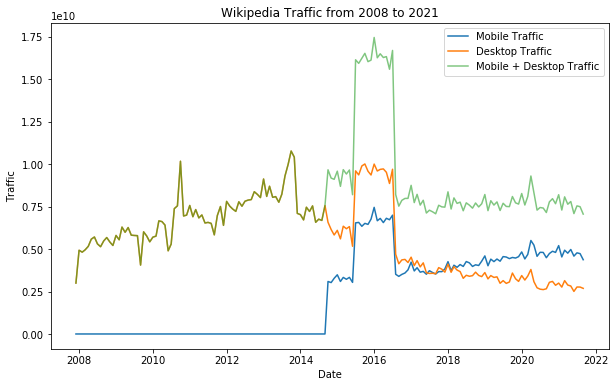

In [26]:
# Plot the visualization
plt.figure(figsize=(10,6))
plt.title('Wikipedia Traffic from 2008 to 2021')
plt.plot(df['mobile_traffic'], label = "Mobile Traffic")
plt.plot(df['desktop_traffic'], label = "Desktop Traffic")
plt.plot(df['all_traffic'], label = "Mobile + Desktop Traffic",alpha = 0.6)
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.legend()
plt.savefig('wikipedia traffic.png')
plt.show